In [10]:
import pandas as pd

In [15]:
trxn= pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/Retail_Data_Transactions.csv')
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [17]:
response= pd.read_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [18]:
df= trxn.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [19]:
#missing values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [20]:
#drop missing values
df=df.dropna()

In [21]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [28]:
#change dtype
df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']=df['response'].astype('int64')

C:\Users\asus\AppData\Local\Temp\ipykernel_22476\1832240416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']= pd.to_datetime(df['trans_date'])
C:\Users\asus\AppData\Local\Temp\ipykernel_22476\1832240416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']=df['response'].astype('int64')


In [29]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


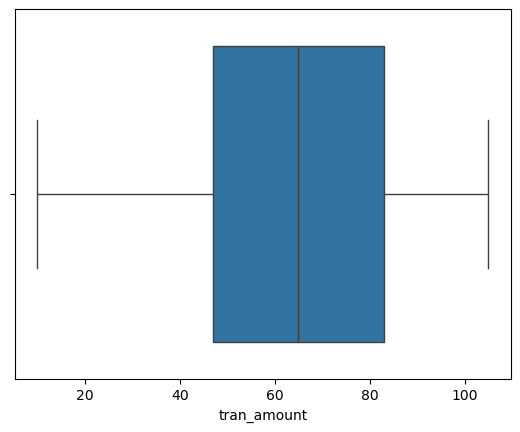

In [46]:
#checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['tran_amount'])
plt.show()

In [51]:
#creating new column
df['month']=df['trans_date'].dt.month
df

C:\Users\asus\AppData\Local\Temp\ipykernel_22476\749626650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [55]:
#which 3 months have had the highest transaction amount?
monthly_sales=df.groupby('month')['tran_amount'].sum()
monthly_sales= monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [65]:
#customers having highest number of orders
customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']
#sort
top_5_customers= customer_counts.sort_values(by='count', ascending=False).reset_index().head(5)
top_5_customers


,index,customer_id,count
0,0,CS4424,39
1,1,CS4320,38
2,2,CS3799,36
3,3,CS3013,35
4,4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

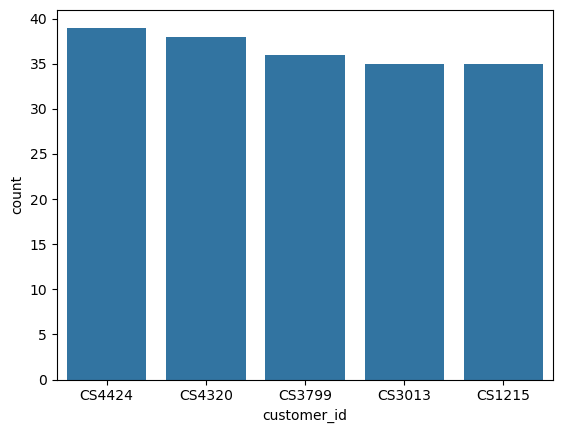

In [68]:
sns.barplot(x='customer_id',y='count',data=top_5_customers)

In [70]:
#customers having highest value of orders
customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

#sort
top_5_sales= customer_sales.sort_values(by='tran_amount', ascending=False).reset_index().head(5)
top_5_sales

,index,customer_id,tran_amount
0,3312,CS4424,2933
1,3208,CS4320,2647
2,4640,CS5752,2612
3,3548,CS4660,2527
4,2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

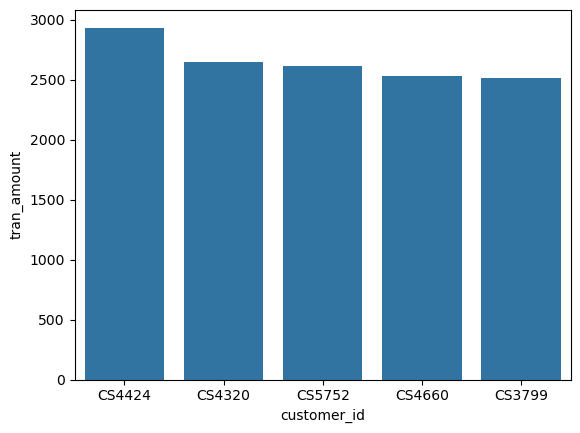

In [71]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sales)

#Time series Analysis

C:\Users\asus\AppData\Local\Temp\ipykernel_22476\2934145013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


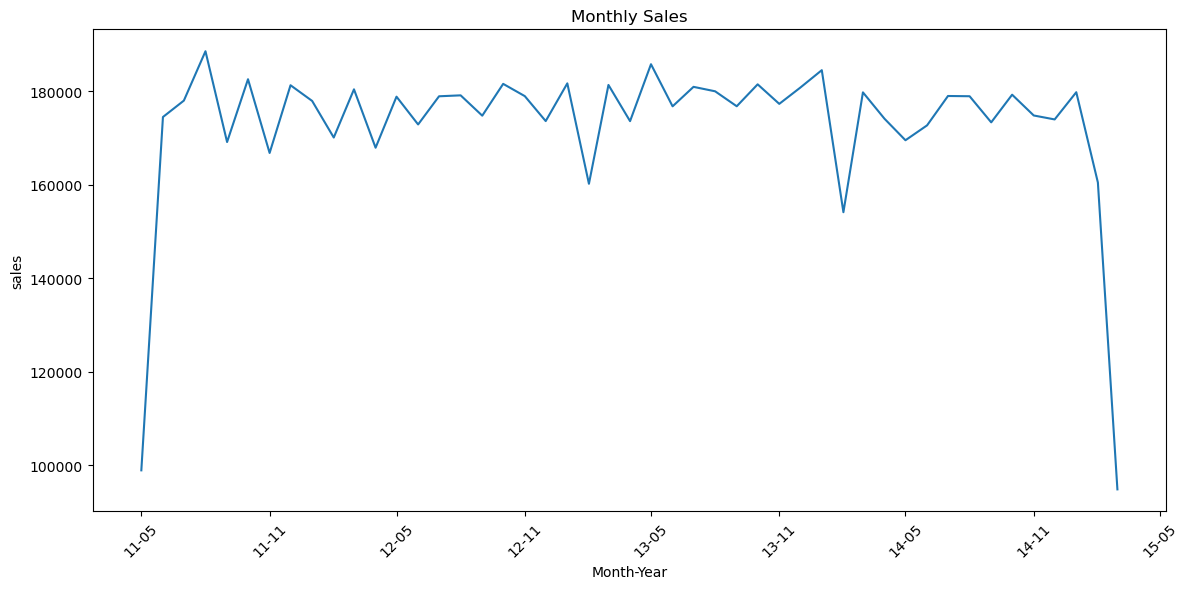

In [86]:
import matplotlib.dates as mdates
df['month_year']=df['trans_date'].dt.to_period('M')
monthly_sales=df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index= monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Cohort Segmentation

In [90]:
#Recency
recency= df.groupby('customer_id')['trans_date'].max()

#frequency
frequency= df.groupby('customer_id')['trans_date'].count()

#Monetary
monetary= df.groupby('customer_id')['tran_amount'].sum()

#Combine
rfm= pd.DataFrame({'recency':recency,'frequency':frequency,'monetary':monetary})
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [92]:
# customer segmentation
def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'
rfm['Segment']= rfm.apply(segment_customer, axis=1)
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


#Churn Analysis

<Axes: xlabel='response'>

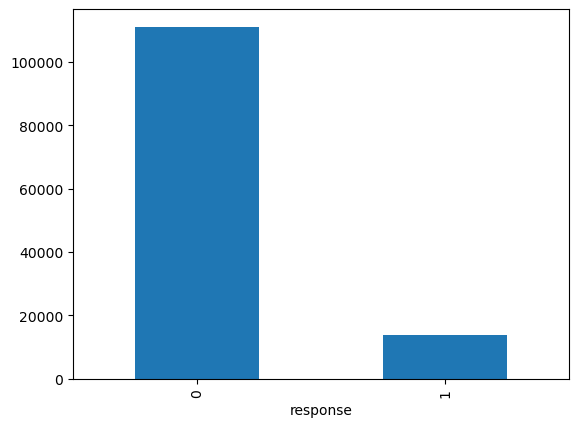

In [93]:
#count the number of churned and active customers
churn_counts= df['response'].value_counts()

churn_counts.plot(kind='bar')

#Analyzing Top Customers

<Axes: xlabel='month_year'>

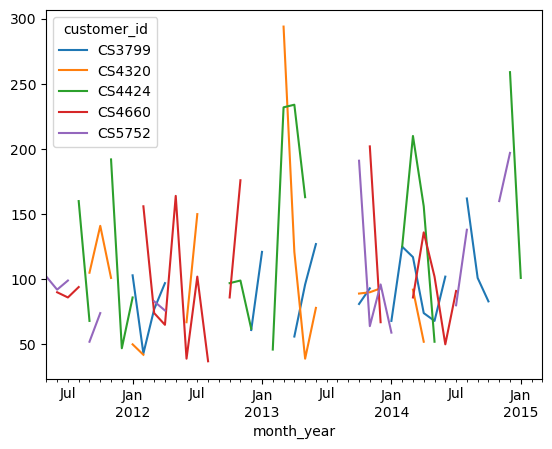

In [94]:
top_5_cus= monetary.sort_values(ascending=False).head(5).index
top_customer_df= df[df['customer_id'].isin(top_5_cus)]

top_customer_sales= top_customer_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [95]:
df.to_csv('MainData.csv')

In [97]:
rfm.to_csv('AddAnalysis.csv')